In [1]:
import os
os.chdir('ZooTransform')

In [2]:
import sys
sys.path.append(os.path.join(os.getcwd(), 'validation'))

In [8]:
import pandas as pd
import numpy as np

# Define species and proteins
species = ['Human', 'Mouse', 'Yeast']
num_proteins = 15

# Generate protein names and scores
data = []
for sp in species:
    for i in range(1, num_proteins + 1):
        protein_name = f"Protein{i}"
        dms_score = np.round(np.random.uniform(-3, 3), 3)  # DMS scores between -3 and 3
        log_likelihood_pre = np.round(np.random.normal(loc=0, scale=3), 3)  # Random normal values
        log_likelihood = np.round(np.random.normal(loc=0, scale=1), 3)  # Random normal values
        data.append({
            'Species': sp,
            'Protein': protein_name,
            'DMS_score': dms_score,
            'LogLikelihoodPre': log_likelihood_pre,
            'LogLikelihood': log_likelihood
        })

# Create DataFrame
df = pd.DataFrame(data)


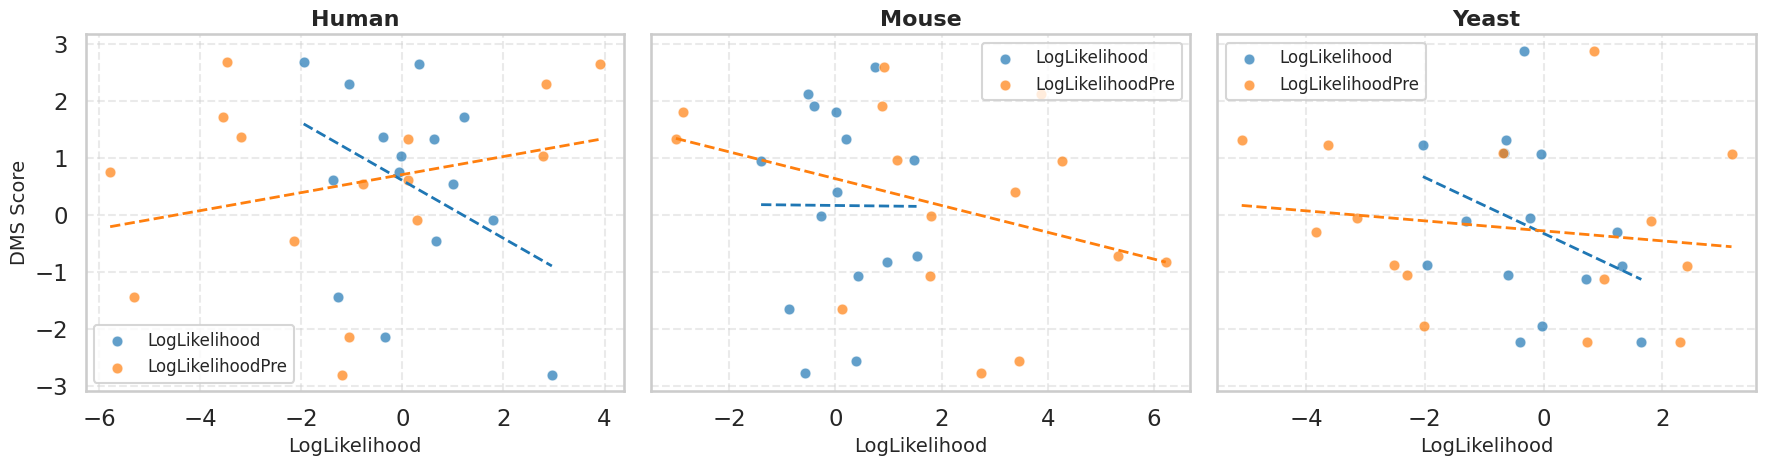

In [20]:
from validation.visualization import plot_loglikelihood_vs_dmscore

plot_loglikelihood_vs_dmscore(df)

In [ ]:
## load GYM data:
from zooTransform.src.dataset.protein_gyn_download_and_clean import download_gym_data, get_gym_data
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch


data = get_gym_data()
data.head()


model_name = "facebook/esm2_t6_8M_UR50D"

model = AutoModelForMaskedLM.from_pretrained(model_name).to(DEVICE)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Loading CSV files...
['src/dataset/ProteinGym_DMS_data/DMS_ProteinGym_substitutions/SDA_BACSU_Tsuboyama_2023_1PV0.csv', 'src/dataset/ProteinGym_DMS_data/DMS_ProteinGym_substitutions/PAI1_HUMAN_Huttinger_2021.csv', 'src/dataset/ProteinGym_DMS_data/DMS_ProteinGym_substitutions/S22A1_HUMAN_Yee_2023_activity.csv', 'src/dataset/ProteinGym_DMS_data/DMS_ProteinGym_substitutions/HIS7_YEAST_Pokusaeva_2019.csv', 'src/dataset/ProteinGym_DMS_data/DMS_ProteinGym_substitutions/AMIE_PSEAE_Wrenbeck_2017.csv', 'src/dataset/ProteinGym_DMS_data/DMS_ProteinGym_substitutions/ACE2_HUMAN_Chan_2020.csv', 'src/dataset/ProteinGym_DMS_data/DMS_ProteinGym_substitutions/RDRP_I33A0_Li_2023.csv', 'src/dataset/ProteinGym_DMS_data/DMS_ProteinGym_substitutions/CASP3_HUMAN_Roychowdhury_2020.csv', 'src/dataset/ProteinGym_DMS_data/DMS_ProteinGym_substitutions/RL40A_YEAST_Roscoe_2014.csv', 'src/dataset/ProteinGym_DMS_data/DMS_ProteinGym_substitutions/SRC_HUMAN_Chakraborty_2023_binding-DAS_25uM.csv', 'src/dataset/ProteinGym

,DMS_score,mutated_sequence
0,-0.144916,HSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTFA...
1,-0.088513,HSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTFA...
2,-0.118531,HSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTFA...
3,-0.087970,HSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTFA...
4,-0.080127,HSQKRVVVLGSGVIGLSSALILARKGYSVHILARDLPEDVSSQTFA...


In [ ]:


sequences = data["mutated_sequence"].tolist()
batch_size = 512



100%|██████████| 99/99 [01:30<00:00,  1.09it/s]


50376

In [18]:
all_outputs[-1].shape,len(batch_seqs[0])

((200, 568, 320), 566)

In [ ]:
import numpy as np

np.split(all_outputs[-1], all_outputs[-1].shape[0], axis=0)

{'MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGEICDSPHQILDGKNCTLIDALLGDPQCDDFQNKKWDLFVERSKAYSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVTQNGTSSACIRRSKNSFFSRLNWLTHLNFKYPALNVTMPNNEQFDKLYIWGVLHPGTDKDQIFLYAQASGRITVSTKRSQQIVSPNIGSRPRVRNIPSRISIYWTIVKPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSECITPNGSIPNDKPFQNVNRITYGACPRYVKQNTLKLATGMRNVPEKQTRGIFGAIAGFIENGWEGMVDGWYGFRHQNSEGRGQAADLKSTQAAIDQINGKLNRLIGKTNEKFHQIEKEFSEVEGRIQDLEKYVEDTKIDLWSYNAELLVALENQHTIDLTDSEMNKLFEKTKKQLRENAEDMGNGCFKIYHKCDNACIGSIRNGTYDHDVYRDEALNNRFQIKGVELKSGYKDWILWISFAISCFLLCVALLGFIMWACLKGNIRCNICI': array([[[ 0.01343605,  0.44684413,  0.47933304, ...,  1.0697303 ,
          -0.11186942, -0.3193287 ],
         [ 0.17132878,  0.72007936, -0.36895576, ...,  0.7940324 ,
          -0.11680944, -0.13346939],
         [ 0.04179681, -0.2888413 ,  0.40644497, ...,  0.4801584 ,
           0.25717396,  0.3327218 ],
         ...,
         [-0.18201359,  0.02483197,  0.0628996 , ...,  0.05853475,
          -0.01195242, -0.19291033],
